In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('mostpop.csv')

print(data)


       Month  Python Worldwide(%)  JavaScript Worldwide(%)  Java Worldwide(%)  \
0    2004-01                   30                       98                 96   
1    2004-02                   29                       98                 97   
2    2004-03                   28                      100                100   
3    2004-04                   28                       98                 97   
4    2004-05                   28                       91                 99   
..       ...                  ...                      ...                ...   
244  2024-05                   80                       36                 14   
245  2024-06                   76                       32                 14   
246  2024-07                   75                       33                 14   
247  2024-08                   71                       31                 13   
248  2024-09                   79                       31                 13   

     C# Worldwide(%)  PhP W

In [2]:
data.isnull().sum()


Month                      0
Python Worldwide(%)        0
JavaScript Worldwide(%)    0
Java Worldwide(%)          0
C# Worldwide(%)            0
PhP Worldwide(%)           0
Flutter Worldwide(%)       0
React Worldwide(%)         0
Swift Worldwide(%)         0
TypeScript Worldwide(%)    0
Matlab Worldwide(%)        0
dtype: int64

In [3]:
data.describe()

,Python Worldwide(%),JavaScript Worldwide(%),Java Worldwide(%),C# Worldwide(%),PhP Worldwide(%),Flutter Worldwide(%),React Worldwide(%),Swift Worldwide(%),TypeScript Worldwide(%),Matlab Worldwide(%)
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,41.678715,43.963855,35.995984,59.626506,37.477912,22.642570,25.883534,30.678715,23.405622,59.289157
std,23.103231,16.024512,21.897948,20.330958,22.997381,28.368911,32.518210,15.328697,28.603098,13.282170
min,20.000000,24.000000,11.000000,27.000000,13.000000,4.000000,1.000000,8.000000,1.000000,39.000000
25%,23.000000,34.000000,17.000000,45.000000,20.000000,6.000000,1.000000,23.000000,3.000000,50.000000
50%,29.000000,37.000000,34.000000,57.000000,27.000000,8.000000,2.000000,29.000000,4.000000,58.000000
75%,60.000000,48.000000,45.000000,78.000000,48.000000,32.000000,50.000000,37.000000,38.000000,66.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


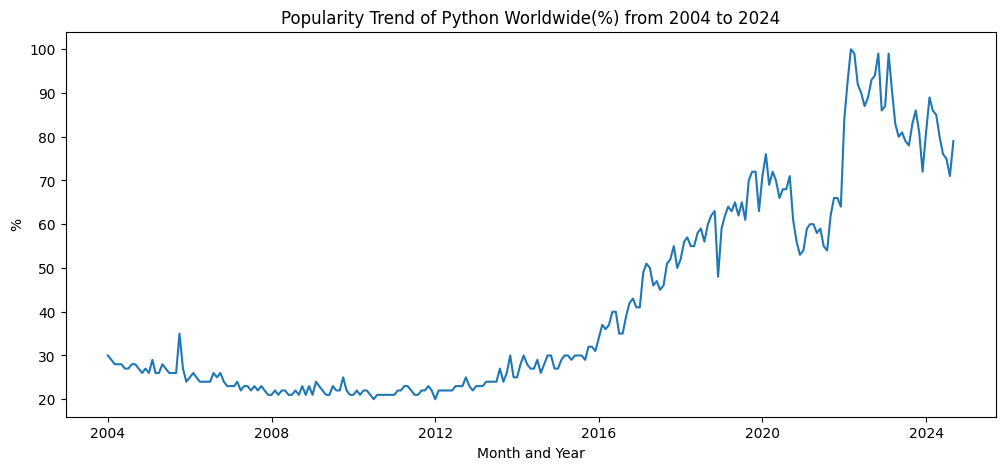

In [19]:
# Convert 'Month' to datetime (already done in your code)
data['Month - Year'] = pd.to_datetime(data['Month'], format='%Y-%m')

# Assuming 'languages' contains the column names for the languages (e.g., 'Python', 'Java', etc.)
languages = data.select_dtypes(include='int64').columns

# Plot for the first language (Example: Python)
plt.figure(figsize=(12, 5))
plt.plot(data['Month - Year'], data[languages[0]], label=languages[0])
plt.title(f'Popularity Trend of {languages[0]} from 2004 to 2024')
plt.xlabel('Month and Year')
plt.ylabel('%')
plt.show()

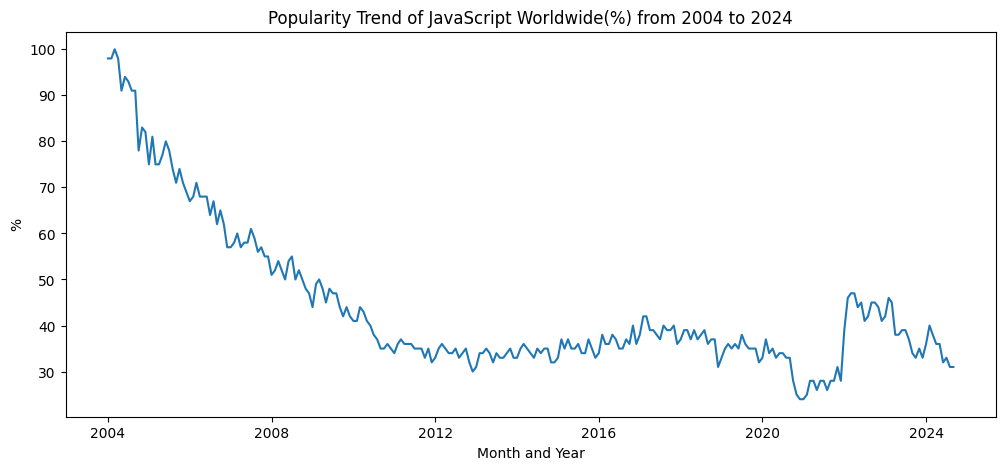

In [20]:
# Plot for the second language (Example: Java)
plt.figure(figsize=(12, 5))
plt.plot(data['Month - Year'], data[languages[1]], label=languages[1])
plt.title(f'Popularity Trend of {languages[1]} from 2004 to 2024')
plt.xlabel('Month and Year')
plt.ylabel('%')
plt.show()

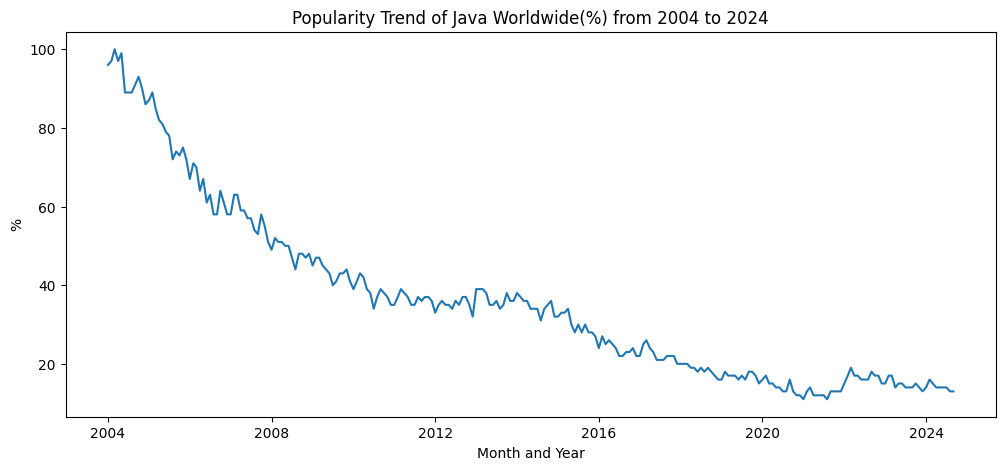

In [21]:
# Plot for the third language (Example: C++)
plt.figure(figsize=(12, 5))
plt.plot(data['Month - Year'], data[languages[2]], label=languages[2])
plt.title(f'Popularity Trend of {languages[2]} from 2004 to 2024')
plt.xlabel('Month and Year')
plt.ylabel('%')
plt.show()

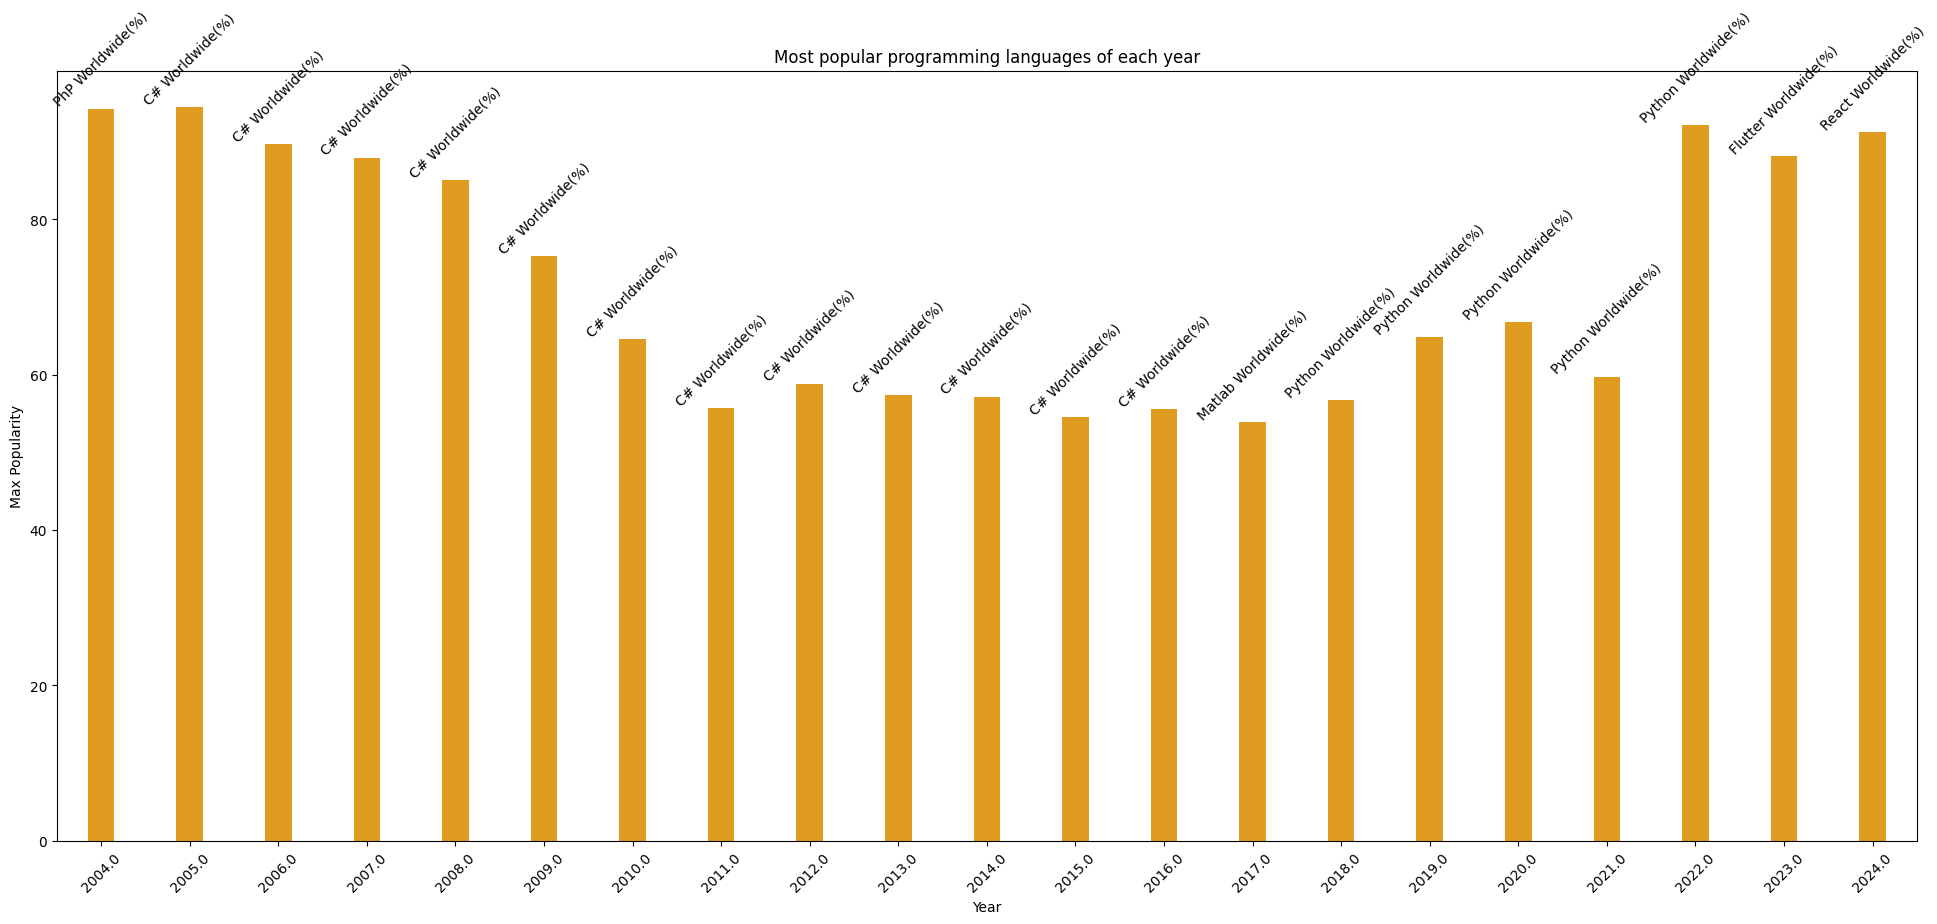

In [29]:
data['Year'] = data['Month - Year'].dt.year

year = data['Year'].unique()
year

maximum_popularity = pd.DataFrame({
    'Year' : [],
    'Language' : str([]),
    'Max Popularity' : []
})
maximum_popularity

for i in range(len(year)):
    maximum_popularity.loc[i,'Year'] = year[i]
    maximum_popularity.loc[i,'Language'] = data[data['Year'] == year[i]][languages].mean().idxmax()
    maximum_popularity.loc[i,'Max Popularity'] = data[data['Year'] == year[i]][languages].mean().max()
maximum_popularity

plt.figure(figsize=(24,10))
fig = sns.barplot(x=maximum_popularity['Year'],y=maximum_popularity['Max Popularity'],color='orange',width=0.3)
fig.bar_label(fig.containers[0],labels=maximum_popularity['Language'],rotation=45)
plt.title('Most popular programming languages of each year')
plt.xticks(rotation=45)
plt.show()

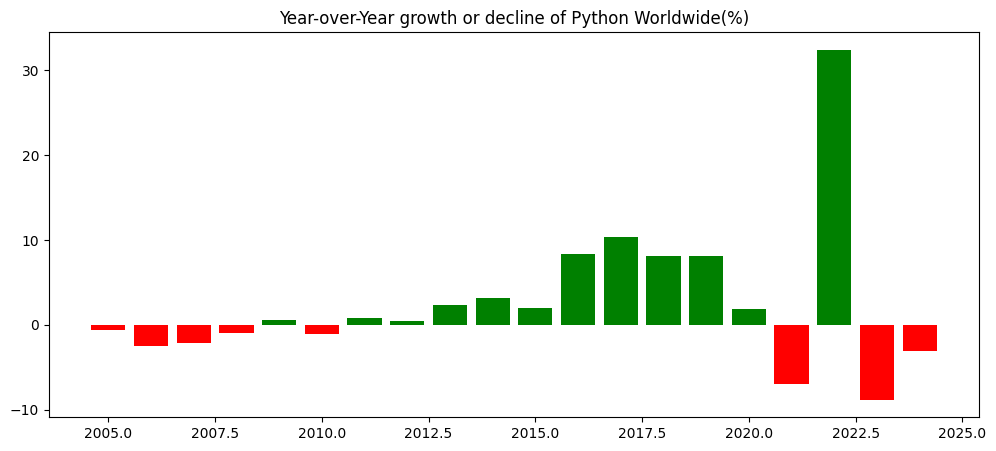

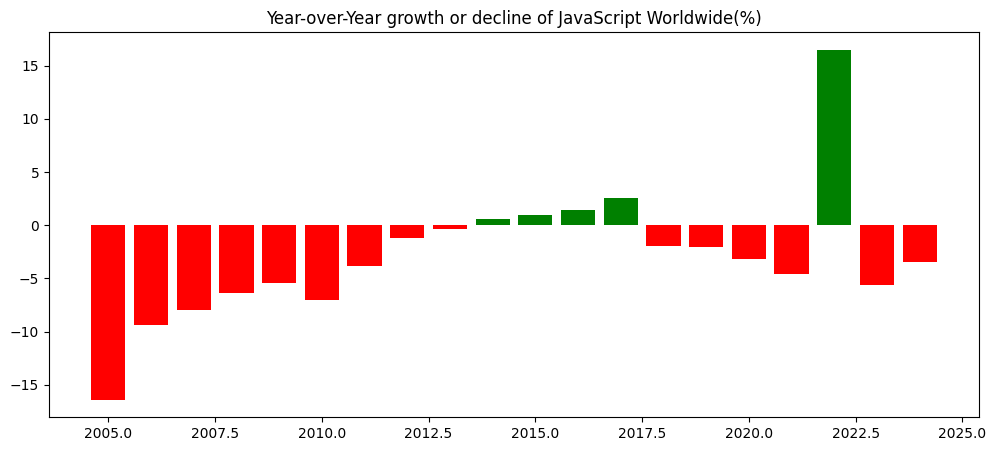

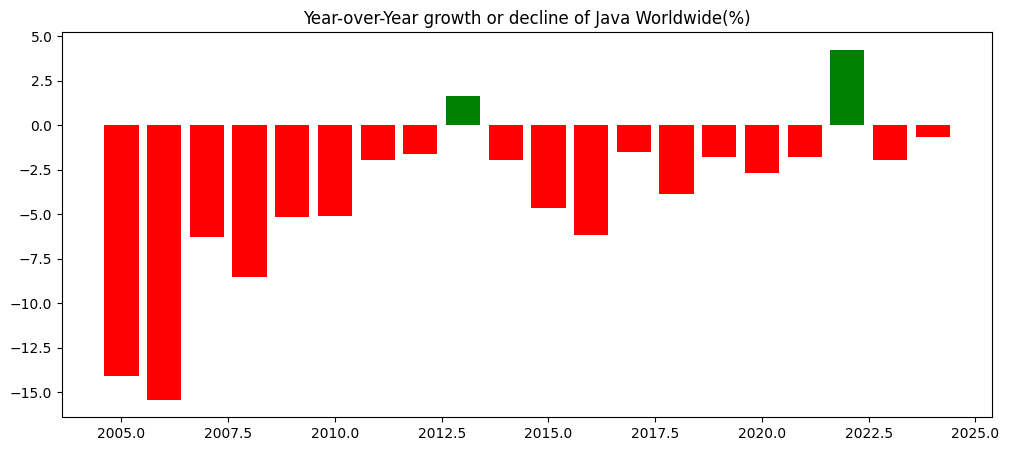

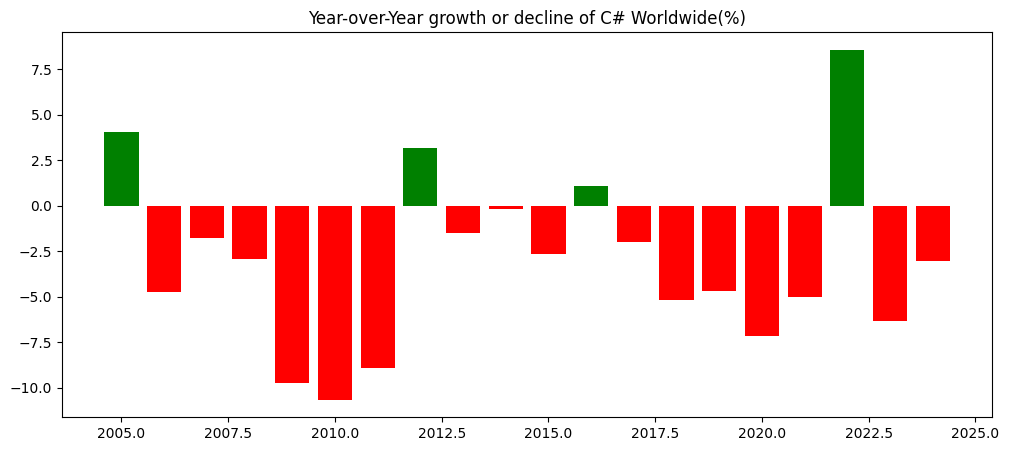

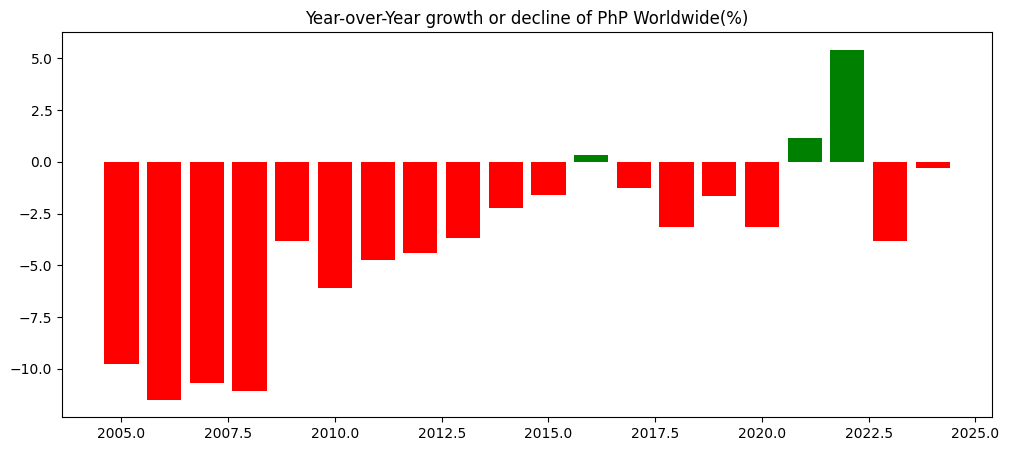

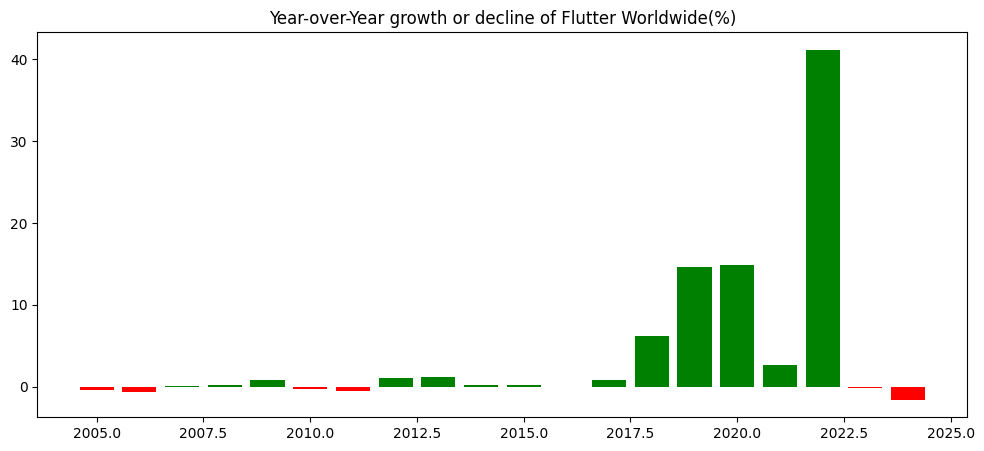

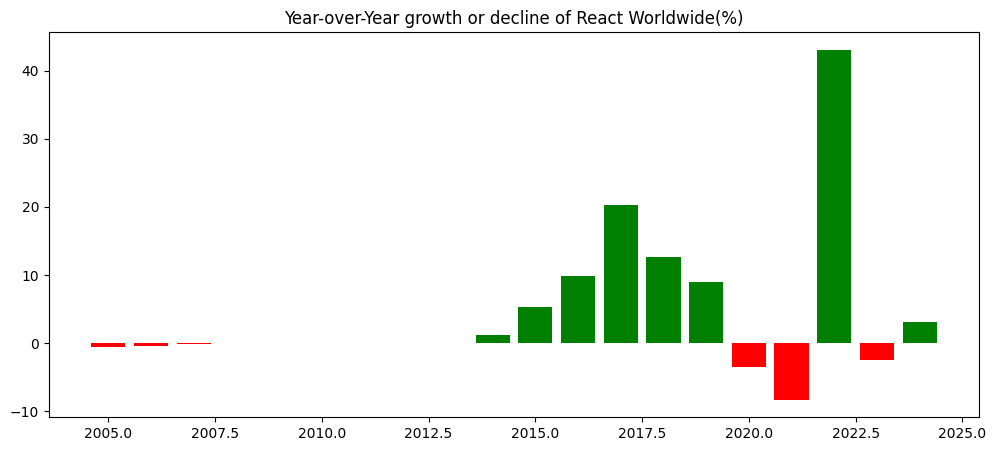

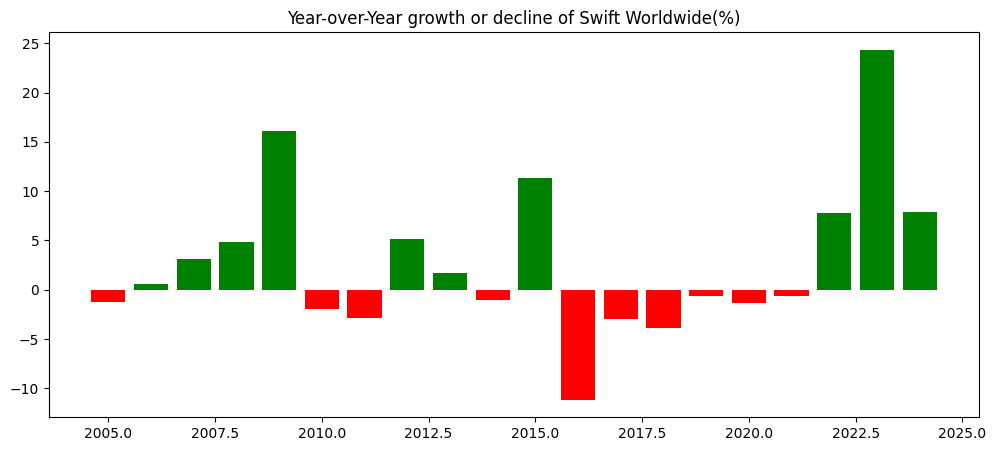

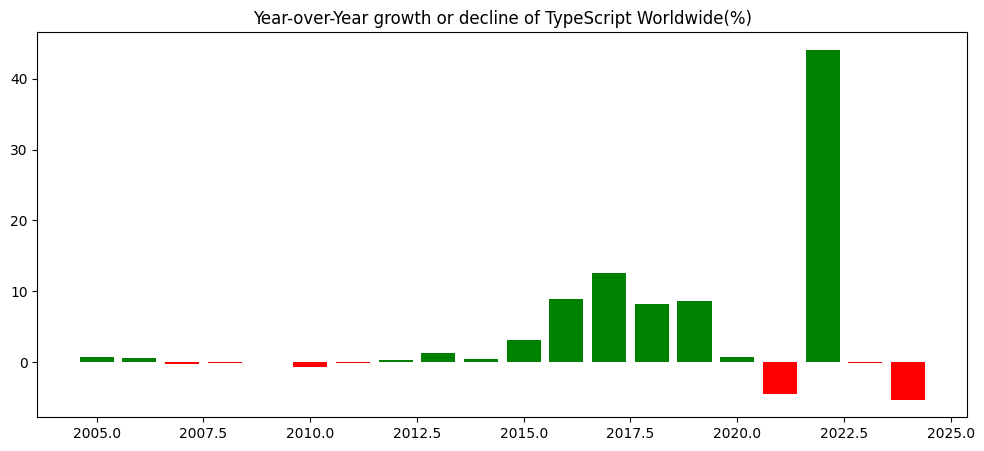

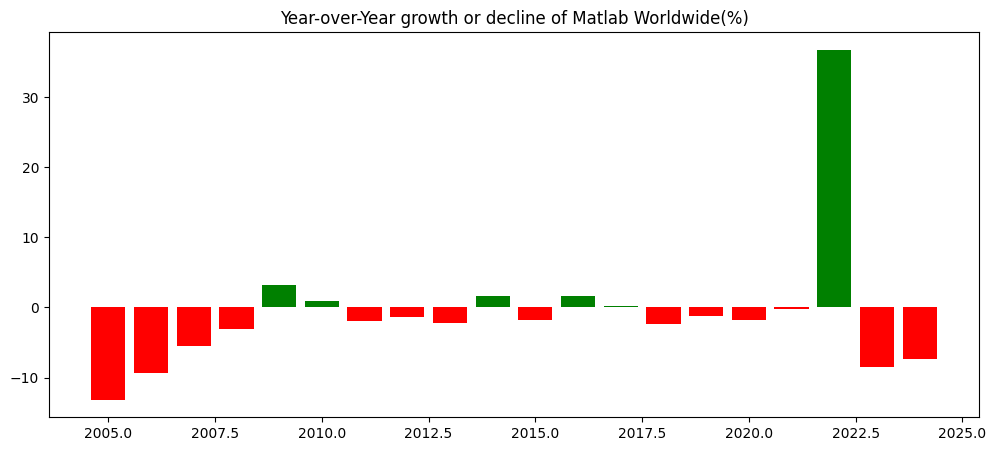

In [31]:
avg_growth = data.groupby('Year')[languages].mean()
avg_growth

yoy_growth = avg_growth[languages].diff().dropna().reset_index()
yoy_growth

for i in range(1,yoy_growth.shape[1]):
    plt.figure(figsize=(12,5))
    barcolors = ['green' if value >= 0 else 'red' for value in yoy_growth[yoy_growth.columns[i]]]
    plt.bar(x=yoy_growth['Year'],height=yoy_growth[yoy_growth.columns[i]],color=barcolors)
    plt.title(f'Year-over-Year growth or decline of {yoy_growth.columns[i]}')
    plt.show()

In [18]:
for i in range(len(languages)):
    print(f'{languages[i]}: {data.loc[data.shape[0]-1,languages[i]] - data.loc[0,languages[i]]}')

Python Worldwide(%): 49
JavaScript Worldwide(%): -67
Java Worldwide(%): -83
C# Worldwide(%): -49
PhP Worldwide(%): -81
Flutter Worldwide(%): 73
React Worldwide(%): 84
Swift Worldwide(%): 50
TypeScript Worldwide(%): 71
Matlab Worldwide(%): -7


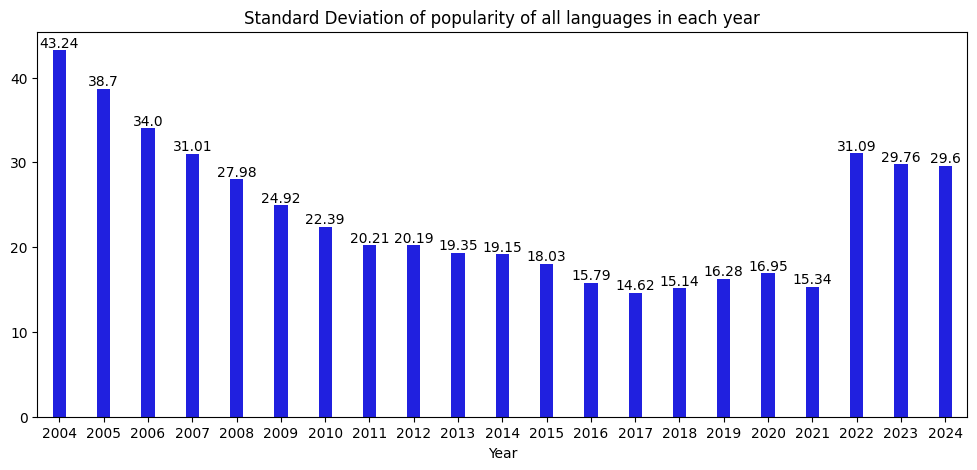

In [32]:
avg_growth.std(axis=1)

plt.figure(figsize=(12,5))
fig = sns.barplot(x=avg_growth.std(axis=1).index,y=avg_growth.std(axis=1).values,color='blue',width=0.3)
plt.title('Standard Deviation of popularity of all languages in each year')
fig.bar_label(fig.containers[0],labels=np.round(avg_growth.std(axis=1).values,2))
plt.show()

In [33]:
print("analysis by hariom")

analysis by hariom
